# Second task 
Data analysis 01 

In [1]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re

In [2]:
%pwd

'/home/adam/projects/github/engineer/notebooks'

In [3]:
%cd /home/adam/projects/github/engineer/data

/home/adam/projects/github/engineer/data


In [4]:
df = pd.read_excel('WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx')
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,World Population Prospects 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,File POP/1-1: Total population (both sexes com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Estimates, 1950 - 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.read_excel('WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',index_col=0, skiprows=16)
df.head(3)

,Variant,"Region, subregion, country or area *",geo,region,island,Notes,Country code,Type,Parent code,1950,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Index,,,,,,,,,,,,,,,,,,,,,
1,Estimates,WORLD,NaN,NaN,NaN,NaN,900,World,0,2.53643e+06,...,7.04119e+06,7.12583e+06,7.21058e+06,7.29529e+06,7.3798e+06,7.46402e+06,7.54786e+06,7.63109e+06,7.71347e+06,7.7948e+06
2,Estimates,UN development groups,NaN,NaN,NaN,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...
3,Estimates,More developed regions,NaN,NaN,NaN,b,901,Development Group,1803,814819,...,1.23956e+06,1.24411e+06,1.24845e+06,1.25262e+06,1.25662e+06,1.26048e+06,1.26415e+06,1.26756e+06,1.27063e+06,1.2733e+06


In [6]:
# create list with column names
list_names = [str(x) for x in range(1950,2020)]
# print(list_names)

In [7]:
# remove columns
df = df.drop(columns=list_names)
df.head(3)
df.columns = ['Variant', 'Country','geo','region','island', 'Notes','Ccode', 'Type', 'Pcode', 'c2020']
df.head(1)

,Variant,Country,geo,region,island,Notes,Ccode,Type,Pcode,c2020
Index,,,,,,,,,,
1,Estimates,WORLD,NaN,NaN,NaN,NaN,900,World,0,7.7948e+06


In [8]:
for col in df.columns[:-1]:
    print(f'{col}:\n',pd.unique(df[f'{col}']),'\n')

Variant:
 ['Estimates'] 

Country:
 ['WORLD' 'UN development groups' 'More developed regions'
 'Less developed regions' 'Least developed countries'
 'Less developed regions, excluding least developed countries'
 'Less developed regions, excluding China'
 'Land-locked Developing Countries (LLDC)'
 'Small Island Developing States (SIDS)' 'World Bank income groups'
 'High-income countries' 'Middle-income countries'
 'Upper-middle-income countries' 'Lower-middle-income countries'
 'Low-income countries' 'No income group available' 'Geographic regions'
 'Africa' 'Asia' 'Europe' 'Latin America and the Caribbean'
 'Northern America' 'Oceania' 'Sustainable Development Goal (SDG) regions'
 'SUB-SAHARAN AFRICA' 'Eastern Africa' 'Burundi' 'Comoros' 'Djibouti'
 'Eritrea' 'Ethiopia' 'Kenya' 'Madagascar' 'Malawi' 'Mauritius' 'Mayotte'
 'Mozambique' 'Réunion' 'Rwanda' 'Seychelles' 'Somalia' 'South Sudan'
 'Uganda' 'United Republic of Tanzania' 'Zambia' 'Zimbabwe'
 'Middle Africa' 'Angola' 'Cameroon' 

In [9]:
delCol = ['Variant', 'Notes', 'Ccode','Pcode']
delRow = ['World','Label/Separator','Development Group','Special other','Income Group',\
      'Region','SDG region','Subregion','SDG subregion']

In [10]:
# drop columns in 'delCol' list
df = df.drop(columns=delCol)
for val in delRow:
    df = df[df.Type != val]
    


# remove 'Type' column
df = df.drop(columns='Type')
df.shape

(235, 5)

In [11]:
df.sort_values('c2020', ascending=False).head(10)

,Country,geo,region,island,c2020
Index,,,,,
128,China,asia,east,no,1.43932e+06
120,India,asia,south,no,1.38e+06
289,United States of America,america,north,no,331003
139,Indonesia,asia,south-east,no,273524
124,Pakistan,asia,south,no,220892
190,Brazil,america,south,no,212559
76,Nigeria,africa,west,no,206140
118,Bangladesh,asia,south,no,164689
240,Russian Federation,europe,east,no,145934


In [12]:
# get information about 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 27 to 289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  235 non-null    object
 1   geo      235 non-null    object
 2   region   235 non-null    object
 3   island   235 non-null    object
 4   c2020    235 non-null    object
dtypes: object(5)
memory usage: 11.0+ KB


In [13]:
df.loc[:,'c2020'] = df.c2020.convert_dtypes()*1000
df.loc[:,'c2020'] = df.c2020.astype('int')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 27 to 289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  235 non-null    object
 1   geo      235 non-null    object
 2   region   235 non-null    object
 3   island   235 non-null    object
 4   c2020    235 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 11.0+ KB


,Country,geo,region,island,c2020
Index,,,,,
27,Burundi,africa,east,no,11890781
28,Comoros,africa,east,no,869595
29,Djibouti,africa,east,no,988002
30,Eritrea,africa,east,no,3546427
31,Ethiopia,africa,east,no,114963583


In [14]:
df.sort_values('c2020',ascending=False).head(10).style.format({'c2020':"{:_}"})

,Country,geo,region,island,c2020
Index,,,,,
128,China,asia,east,no,1_439_323_774
120,India,asia,south,no,1_380_004_385
289,United States of America,america,north,no,331_002_647
139,Indonesia,asia,south-east,no,273_523_621
124,Pakistan,asia,south,no,220_892_331
190,Brazil,america,south,no,212_559_409
76,Nigeria,africa,west,no,206_139_587
118,Bangladesh,asia,south,no,164_689_383
240,Russian Federation,europe,east,no,145_934_460


In [15]:
# Country names validation

# In order to be able to compare the names of countries in differentxh tables, they must be unified. Scope:

#     deleting white characters from the beginning and end
#     replace different white characters between words with one single space
#     each word in the name begins with a capital letter


for i,country in enumerate(df.Country):
    contry = country.strip()
    contry = re.sub(r'\s+',' ',country)
    country = country.title()
    df.iloc[i,0] = country

df.sort_values('c2020',ascending=False).head(10).style.format({'c2020':"{:>_}"})



,Country,geo,region,island,c2020
Index,,,,,
128,China,asia,east,no,1_439_323_774
120,India,asia,south,no,1_380_004_385
289,United States Of America,america,north,no,331_002_647
139,Indonesia,asia,south-east,no,273_523_621
124,Pakistan,asia,south,no,220_892_331
190,Brazil,america,south,no,212_559_409
76,Nigeria,africa,west,no,206_139_587
118,Bangladesh,asia,south,no,164_689_383
240,Russian Federation,europe,east,no,145_934_460


In [16]:
# save data
name = 'countryPopulation.csv'
df.to_csv(name,sep=';',index=False)
%ls

countryPopulation.csv  WHO-COVID-19-global-data.csv
tmp.py                 WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx


# Covid data

In [17]:
cov = pd.read_csv('WHO-COVID-19-global-data.csv',encoding='utf-8')
cov.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [18]:
# column names
print(cov.columns.to_list())
cov.columns = cov.columns.str.strip()
print(cov.columns.to_list())

['Date_reported', ' Country_code', ' Country', ' WHO_region', ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths']
['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']


In [19]:
# drop columns
cov = cov.drop(columns=['Country_code','WHO_region'])
# short names
cov.columns = ['Date', 'Country', 'Ncases','CumCases', 'Ndeaths','Cumdeaths']
cov.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-01-04,Afghanistan,0,0,0,0
2,2020-01-05,Afghanistan,0,0,0,0
3,2020-01-06,Afghanistan,0,0,0,0
4,2020-01-07,Afghanistan,0,0,0,0


In [20]:
s1 = set(df.Country)
s2 = set(cov.Country)
s1.difference(s2)

{'Antigua And Barbuda',
 'Bolivia (Plurinational State Of)',
 'Bonaire, Sint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Channel Islands',
 'China, Hong Kong Sar',
 'China, Macao Sar',
 'China, Taiwan Province Of China',
 "Côte D'Ivoire",
 "Dem. People'S Republic Of Korea",
 'Democratic Republic Of The Congo',
 'Iran (Islamic Republic Of)',
 'Isle Of Man',
 "Lao People'S Democratic Republic",
 'Micronesia (Fed. States Of)',
 'Northern Mariana Islands',
 'Republic Of Korea',
 'Republic Of Moldova',
 'Saint Kitts And Nevis',
 'Saint Martin (French Part)',
 'Saint Pierre And Miquelon',
 'Saint Vincent And The Grenadines',
 'Sao Tome And Principe',
 'Sint Maarten (Dutch Part)',
 'State Of Palestine',
 'Trinidad And Tobago',
 'Turks And Caicos Islands',
 'United Kingdom',
 'United Republic Of Tanzania',
 'United States Of America',
 'Venezuela (Bolivarian Republic Of)',
 'Wallis And Futuna Islands',
 'Western Sahara'}

In [21]:
s2.difference(s1)

{'Antigua and Barbuda',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Côte d’Ivoire',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Guernsey',
 'Iran (Islamic Republic of)',
 'Isle of Man',
 'Jersey',
 'Kosovo[1]',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Northern Mariana Islands (Commonwealth of the)',
 'Other',
 'Pitcairn Islands',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Sint Maarten',
 'The United Kingdom',
 'Trinidad and Tobago',
 'Turks and Caicos Islands',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Wallis and Futuna',
 'occupied Palestinian territory, including east Jerusalem'}

In [22]:
pop = df
dif = s1.symmetric_difference(s2)
print(dif)

{'Bonaire, Sint Eustatius and Saba', 'Democratic Republic Of The Congo', 'Republic of Korea', 'Sao Tome And Principe', 'Iran (Islamic Republic of)', 'Iran (Islamic Republic Of)', 'Isle Of Man', 'Venezuela (Bolivarian Republic of)', 'United States of America', 'Trinidad And Tobago', 'Northern Mariana Islands (Commonwealth of the)', 'Turks and Caicos Islands', 'Saint Martin', 'The United Kingdom', 'Western Sahara', 'Antigua And Barbuda', 'Bosnia And Herzegovina', 'Democratic Republic of the Congo', 'Micronesia (Fed. States Of)', 'China, Taiwan Province Of China', 'Antigua and Barbuda', 'Bosnia and Herzegovina', 'Turks And Caicos Islands', 'Bolivia (Plurinational State of)', 'Guernsey', "Lao People's Democratic Republic", "Democratic People's Republic of Korea", 'United States Of America', 'Channel Islands', 'Sint Maarten (Dutch Part)', 'Saint Pierre and Miquelon', 'China, Macao Sar', 'Pitcairn Islands', 'State Of Palestine', 'Kosovo[1]', 'Wallis And Futuna Islands', 'Republic Of Korea', 

In [23]:
data = cov.merge(pop,on='Country')
data.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,region,island,c2020
0,2020-01-03,Afghanistan,0,0,0,0,asia,south,no,38928341
1,2020-01-04,Afghanistan,0,0,0,0,asia,south,no,38928341
2,2020-01-05,Afghanistan,0,0,0,0,asia,south,no,38928341
3,2020-01-06,Afghanistan,0,0,0,0,asia,south,no,38928341
4,2020-01-07,Afghanistan,0,0,0,0,asia,south,no,38928341


In [24]:
idx = cov.Date == '2020-10-28'
idx[idx==True]
tmp = cov.loc[idx]
tmp.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths
299,2020-10-28,Afghanistan,95,41032,5,1523
599,2020-10-28,Albania,284,19729,7,487
899,2020-10-28,Algeria,789,56419,25,1922
1199,2020-10-28,American Samoa,0,0,0,0
1499,2020-10-28,Andorra,85,4410,0,72


In [25]:
data = tmp.merge(pop,on="Country")
print(data.shape)
data.head()


(202, 10)


,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,region,island,c2020
0,2020-10-28,Afghanistan,95,41032,5,1523,asia,south,no,38928341
1,2020-10-28,Albania,284,19729,7,487,europe,south,no,2877800
2,2020-10-28,Algeria,789,56419,25,1922,africa,north,no,43851043
3,2020-10-28,American Samoa,0,0,0,0,oceania,polynesia,yes,55197
4,2020-10-28,Andorra,85,4410,0,72,europe,south,no,77265


In [26]:
set(data.Country)

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Gh

In [27]:
# analysis


In [28]:
data.Cumdeaths.describe()

count       202.000000
mean       4188.237624
std       16253.614287
min           0.000000
25%          22.750000
50%         138.500000
75%        1157.500000
max      157397.000000
Name: Cumdeaths, dtype: float64

NameError: name 'x' is not defined

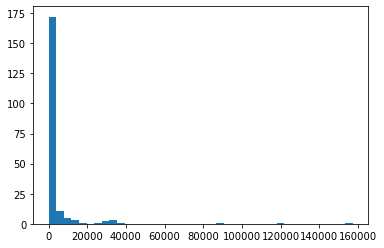

In [29]:
plt.hist(data.Cumdeaths,bins=40)
plt.plot(x,y,'--r')

In [ ]:
def myPdf(data,n=100):
    data = data.copy()
    mu = data.std()
    s = data.std()
    rng = (data.min(),data.max())
    x = np.random.uniform(*rng,n)
    x.sort()
    y = (1/(s*(2*np.pi)**0.5))*np.exp(-0.5*((x-mu)/s)**2)
    return x,y

In [ ]:
x,y = myPdf(data.Cumdeaths)

In [ ]:
# print(x,y)
plt.hist(data.Cumdeaths,bins=10)
plt.plot(x,y,'--r')

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro?

In [ ]:
print('stats: {}\tp-val{}'.format(*shapiro(data.Cumdeaths)))

In [ ]:
plt.bar(data.Country,data.Cumdeaths)

In [ ]:
data.sort_values('Cumdeaths',inplace=True)
# d1 = data[data.Cumdeaths < 126]
d1 = data[:160]
plt.bar(d1.Country,d1.Cumdeaths)

In [ ]:
d2 = data.iloc[160:,:]
plt.bar(d2.Country,d2.Cumdeaths)

In [ ]:
rr = np.round(np.linspace(0,data.shape[0],4),0).astype(int).tolist()

In [ ]:
for i,v in enumerate(rr[:-1]):
    tmp = data.iloc[rr[i]:rr[i+1]]
d1 = data[:160]
d2 = data.iloc[160:,:]

plt.subplot(2,2,1)

plt.bar(d1.Country,d1.Cumdeaths)

plt.subplot(2,2,2)
plt.bar(d2.Country,d2.Cumdeaths)

In [ ]:
plt.scatter(data.c2020,data.Cumdeaths)

In [ ]:
cof = np.polyfit(data.c2020,data.Cumdeaths,1)
rr = np.poly1d(cof)
yy = rr(data.c2020)
plt.scatter(data.c2020,data.Cumdeaths)
plt.plot(data.c2020,yy,'r')